In [2]:
import pandas as pd

In [3]:
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")


In [ ]:
df5.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Salvador,2018-01-01,31.06,1037,3
1,Salvador,2018-01-01,19.02,1034,3
2,Salvador,2019-02-10,173.59,1035,3
3,Salvador,2019-02-10,176.34,1037,3
4,Salvador,2019-02-14,19.47,1037,3


In [4]:
#juntando arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [ ]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [ ]:
df.head(
    
)

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
87,Fortaleza,2019-01-01,42.04,1002,5
208,Salvador,2019-01-02,39.40,1036,3
48,Salvador,2019-01-01,127.28,1035,2
67,Natal,2019-02-14,379.00,852,2
81,Salvador,2019-01-01,17.36,1037,2


In [ ]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [ ]:
df["LojaID"] = df["LojaID"].astype("object")

In [ ]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [ ]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
df["Vendas"].fillna(df["Vendas"].mean, inplace=True)

In [ ]:
df["Vendas"].fillna(0, inplace=True)

In [ ]:
#dropar nulos
df["Vendas"].dropna(inplace=True)

In [ ]:
#dropar linha com valores nulos olhando para coluna
df.dropna(subset=["Vendas"], inplace=True)

In [ ]:
#drop de todas linhas em nulo
df.dropna(how="all", inplace=True)

In [5]:
#Criar colunas
df["Receitas"] = df["Vendas"].mul(df["Qtde"])
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receitas
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [ ]:
#Maior receita
df["Receitas"].max()

3544.0

In [ ]:
#menor receita
df["Receitas"].min()

3.34

In [ ]:
#nlargest Top
df.nlargest(3, "Receitas")


,Cidade,Data,Vendas,LojaID,Qtde,Receitas
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [ ]:
#nsmallest Menores
df.nsmallest(3, "Receitas")

,Cidade,Data,Vendas,LojaID,Qtde,Receitas
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [ ]:
#Agrupamento
df.groupby("Cidade")["Receitas"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receitas, dtype: float64

In [ ]:
#Ordenando
df.sort_values("Receitas", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


In [ ]:
#transformando a coluna data em tipo int
df["Data"] = df["Data"].astype("int64")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


In [ ]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [ ]:
#transformar int em data
df["Data"] = pd.to_datetime(df["Data"])

In [ ]:
#agrupamento por ano
df.groupby(df["Data"].dt.year)["Receitas"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receitas, dtype: float64

In [6]:
#criando nova coluna com ano
df["Ano de Venda"] = df["Data"].dt.year

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Ano de Venda
40,Salvador,2019-02-13,161.87,1036,3,485.61,2019
158,Natal,2019-01-02,183.64,1037,3,550.92,2019
58,Salvador,2019-01-01,20.64,1037,2,41.28,2019
129,Aracaju,2018-01-01,13.70,1522,6,82.20,2018
7,Fortaleza,2019-02-11,35.50,1003,2,71.00,2019


In [7]:
df["Mes_venda"], df["Dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [ ]:
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Ano de Venda,Mes_venda,Dia_venda
79,Aracaju,2018-01-01,5.59,1521,4,22.36,2018,1,1
125,Fortaleza,2019-03-02,37.60,983,4,150.40,2019,3,2
204,Salvador,2019-01-02,151.41,1037,2,302.82,2019,1,2
119,Recife,2019-03-02,152.30,982,7,1066.10,2019,3,2
35,Salvador,2019-01-01,241.45,1037,1,241.45,2019,1,1
61,Salvador,2019-01-01,4.54,1036,3,13.62,2019,1,1
217,Natal,2019-01-02,37.65,1036,2,75.30,2019,1,2
170,Natal,2019-01-02,9.26,1035,3,27.78,2019,1,2
45,Fortaleza,2019-01-01,39.63,1004,3,118.89,2019,1,1
97,Fortaleza,2019-01-01,139.70,1003,4,558.80,2019,1,1


In [ ]:
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [8]:
df["Diferenca_dias"] = df["Data"] - df["Data"].min()

In [ ]:
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Ano de Venda,Mes_venda,Dia_venda,Diferenca_dias
51,Recife,2019-01-01,146.95,982,2,293.90,2019,1,1,365 days
157,Salvador,2019-01-02,150.17,1036,2,300.34,2019,1,2,366 days
239,Natal,2019-01-03,161.41,1037,3,484.23,2019,1,3,367 days
88,Natal,2019-01-02,31.20,1036,1,31.20,2019,1,2,366 days
68,Natal,2018-06-22,274.00,852,3,822.00,2018,6,22,172 days
25,Natal,2019-01-13,611.00,852,2,1222.00,2019,1,13,377 days
28,Aracaju,2018-01-01,114.93,1520,5,574.65,2018,1,1,0 days
91,Natal,2019-01-02,17.74,1035,1,17.74,2019,1,2,366 days
108,Aracaju,2018-01-01,31.94,1520,8,255.52,2018,1,1,0 days
36,Aracaju,2018-01-01,37.99,1523,8,303.92,2018,1,1,0 days


In [9]:
df["Diferenca_trimestre"] = df["Data"].dt.quarter

In [ ]:
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Ano de Venda,Mes_venda,Dia_venda,Diferenca_dias,Diferenca_trimestre
97,Recife,2019-01-01,153.04,983,4,612.16,2019,1,1,365 days,1
78,Aracaju,2018-01-01,154.85,1522,9,1393.65,2018,1,1,0 days,1
75,Aracaju,2018-01-01,160.64,1523,9,1445.76,2018,1,1,0 days,1
6,Natal,2018-07-02,322.00,852,4,1288.00,2018,7,2,182 days,3
5,Aracaju,2018-01-01,156.20,1522,1,156.20,2018,1,1,0 days,1
2,Recife,2019-02-10,12.94,983,5,64.70,2019,2,10,405 days,1
84,Salvador,2019-01-01,22.99,1036,1,22.99,2019,1,1,365 days,1
9,Fortaleza,2019-01-01,11.17,1002,6,67.02,2019,1,1,365 days,1
15,Aracaju,2018-01-01,153.28,1523,6,919.68,2018,1,1,0 days,1
14,Recife,2019-01-12,102.91,982,3,308.73,2019,1,12,376 days,1


In [10]:
#filtrar 2019 em março
vendas_marco_2019 = df.loc[(df["Data"].dt.year==2019) & (df["Data"].dt.month==3)]

In [ ]:
vendas_marco_2019.sample(15)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Ano de Venda,Mes_venda,Dia_venda,Diferenca_dias,Diferenca_trimestre
140,Salvador,2019-03-02,20.79,1036,2,41.58,2019,3,2,425 days,1
137,Recife,2019-03-02,51.99,983,3,155.97,2019,3,2,425 days,1
122,Fortaleza,2019-03-02,235.06,983,3,705.18,2019,3,2,425 days,1
121,Salvador,2019-03-02,100.70,1037,3,302.10,2019,3,2,425 days,1
119,Salvador,2019-03-02,136.37,1034,2,272.74,2019,3,2,425 days,1
134,Fortaleza,2019-03-02,195.18,980,5,975.90,2019,3,2,425 days,1
132,Fortaleza,2019-03-02,17.49,983,5,87.45,2019,3,2,425 days,1
5,Natal,2019-03-30,674.00,854,2,1348.00,2019,3,30,453 days,1
109,Salvador,2019-03-02,124.37,1035,1,124.37,2019,3,2,425 days,1
132,Salvador,2019-03-02,19.61,1036,2,39.22,2019,3,2,425 days,1


### Visualização de Dados

In [11]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

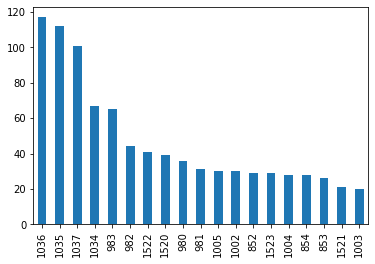

In [12]:
#Grafico de barras
df["LojaID"].value_counts(ascending=False).plot.bar()

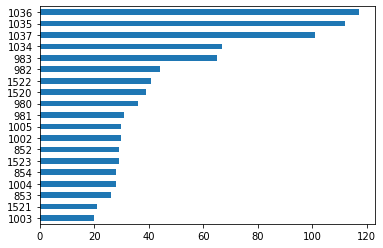

In [16]:
#Barras horizontais
df["LojaID"].value_counts(ascending=True).plot.barh();

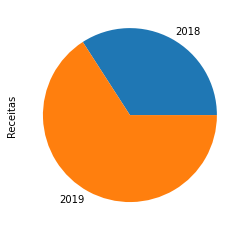

In [18]:
#Grafico em pizza
df.groupby(df["Data"].dt.year)["Receitas"].sum().plot.pie();

In [19]:
#Total de venda por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

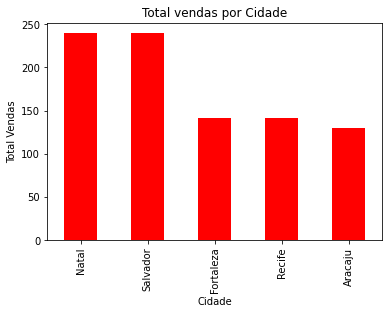

In [21]:
#Add titulo e alterando nome de eixo
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade", color="Red")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [22]:
#Alterando o estilo
plt.style.use("ggplot")

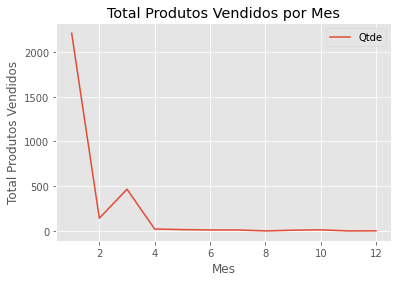

In [25]:
df.groupby(df["Mes_venda"])["Qtde"].sum().plot(title="Total Produtos Vendidos por Mes")
plt.xlabel("Mes")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

In [29]:
df.groupby(df["Mes_venda"])["Qtde"].sum()

Mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [33]:
 #Selecionando apenas as vendas de 2019
 df_2019 = df[df["Ano de Venda"]==2019]

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Ano de Venda,Mes_venda,Dia_venda,Diferenca_dias,Diferenca_trimestre
18,Fortaleza,2019-01-01,38.31,1002,3,114.93,2019,1,1,365 days,1
98,Salvador,2019-01-01,231.76,1036,3,695.28,2019,1,1,365 days,1
160,Salvador,2019-01-02,11.76,1034,1,11.76,2019,1,2,366 days,1
142,Natal,2019-01-02,7.12,1034,1,7.12,2019,1,2,366 days,1
191,Salvador,2019-01-02,173.59,1034,2,347.18,2019,1,2,366 days,1


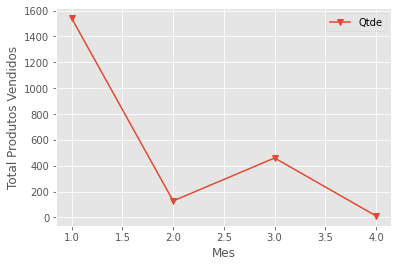

In [34]:
#Total produtos vendidos por mes
df_2019.groupby(df_2019["Mes_venda"])["Qtde"].sum().plot(marker="v")
plt.xlabel("Mes")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

(array([191., 193., 221.,  85.,  54.,  61.,  38.,  31.,  14.,   6.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

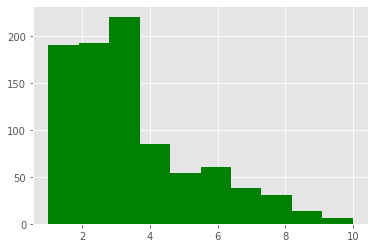

In [35]:
#histograma
plt.hist(df["Qtde"], color="green")

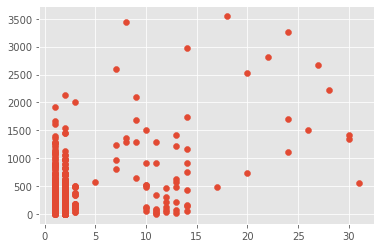

In [37]:
plt.scatter(x=df_2019["Dia_venda"], y=df_2019["Receitas"])

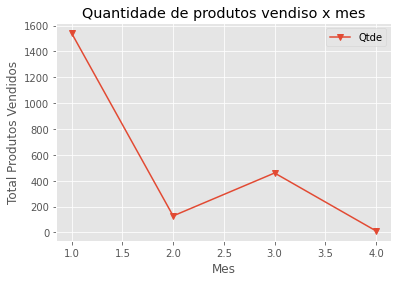

In [38]:
#salvar em png
df_2019.groupby(df_2019["Mes_venda"])["Qtde"].sum().plot(marker="v")
plt.title("Quantidade de produtos vendiso x mes")
plt.xlabel("Mes")
plt.ylabel("Total Produtos Vendidos")
plt.legend()
plt.savefig("grafico QTDE x MES.png")